In [1]:
import sqlite3

In [14]:
conn = sqlite3.connect('sales_data.db')


In [3]:
cursor = conn.cursor()
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Sample sales data
sample_sales = [
    ('Apples', 10, 1.5),
    ('Bananas', 5, 1.2),
    ('Cherries', 20, 2.0),
    ('Apples', 15, 1.5),
    ('Bananas', 7, 1.2)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_sales)
conn.commit()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)


In [6]:
print(df)


    product  total_qty  revenue
0    Apples         25     37.5
1   Bananas         12     14.4
2  Cherries         20     40.0


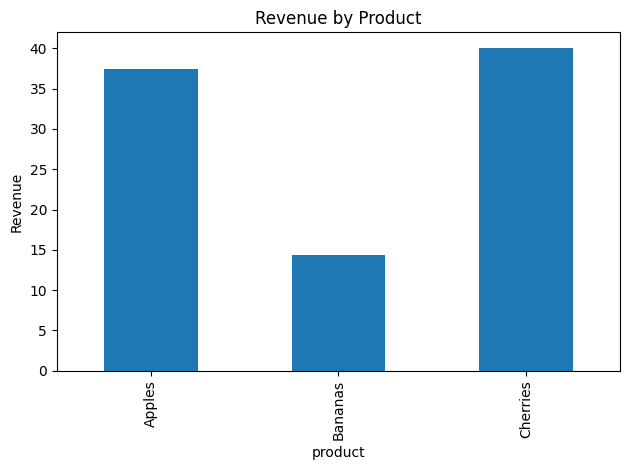

In [ ]:
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.ylabel('Revenue')
plt.title('Revenue by Product')
plt.tight_layout()
plt.savefig('sales_chart.png') 
plt.show()                    


In [15]:
# Query total quantity sold across all products
query_total_qty = "SELECT SUM(quantity) AS total_quantity_sold FROM sales"
df_total_qty = pd.read_sql_query(query_total_qty, conn)
print(df_total_qty)

   total_quantity_sold
0                   57


In [17]:
query_avg_price = "SELECT product, AVG(price) AS avg_price FROM sales GROUP BY product"
df_avg_price = pd.read_sql_query(query_avg_price, conn)
print(df_avg_price)


    product  avg_price
0    Apples        1.5
1   Bananas        1.2
2  Cherries        2.0


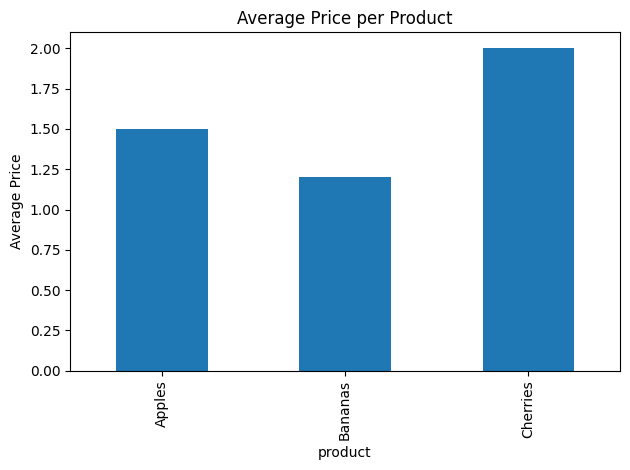

In [21]:
df_avg_price.plot(kind='bar', x='product', y='avg_price', legend=False)
plt.ylabel('Average Price')
plt.title('Average Price per Product')
plt.tight_layout()
plt.savefig('sales_chart2.png')
plt.show()


In [19]:
query_qty = "SELECT product, quantity FROM sales"
df_qty = pd.read_sql_query(query_qty, conn)
print(df_qty)


    product  quantity
0    Apples        10
1   Bananas         5
2  Cherries        20
3    Apples        15
4   Bananas         7


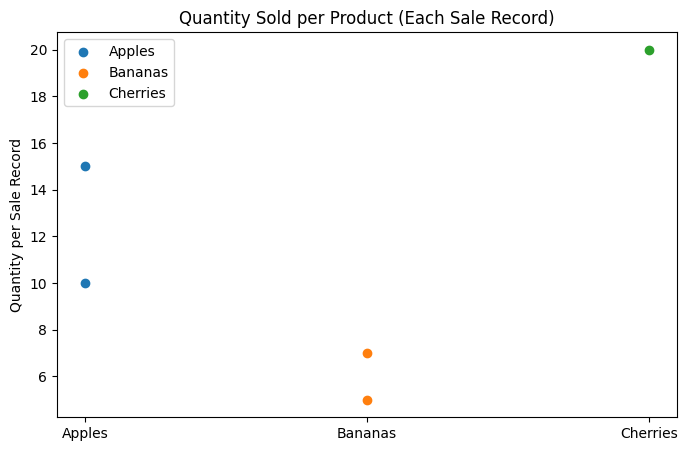

In [22]:
plt.figure(figsize=(8,5))
for product in df_qty['product'].unique():
    product_data = df_qty[df_qty['product'] == product]
    plt.scatter([product]*len(product_data), product_data['quantity'], label=product)
plt.ylabel('Quantity per Sale Record')
plt.title('Quantity Sold per Product (Each Sale Record)')
plt.legend()
plt.savefig('sales_chart3.png')
plt.show()


In [23]:
conn.close()
